In [ ]:
from numpy.typing import NDArray
from typing import Any
from typing import List, Dict
import matplotlib.pyplot as plt
from model_ranking.plots import plot_multitarget_correlations
from model_ranking.results import get_summary_results, results_to_arrays
### If you want plot style to be the same as in the figure download 
### ieee.mplstyle and modify path
mplstyle_path = "/path/to/ieee.mplstyle"
plt.style.use(mplstyle_path)

# Specify data to plot

In [ ]:
source_datasets = ["EPFL", "Hmito", "Rmito"]
targets = ["EPFL", "Hmito", "Rmito", "VNC"]
### Only a single perturbation strength should be specified here at any one time
selected_augmentations = {
    "none": [""],
    "DO": ["a005"],
}
source_models = {
    "EPFL": "E_model",
    "Hmito": "Hm_model",
    "Rmito": "Rm_model",
}
per_target_norms: Dict[str, List[None]] = {
    "EPFL": [None],
    "Hmito": [None],
    "Rmito": [None],
    "VNC": [None],
}

result_folders = {
    "EPFL": "exp1",
    "Hmito": "exp1",
    "Rmito": "exp1",
    "VNC": "exp1",
}
consis_keys = {
    "EPFL": "HD_consis",
    "Hmito": "HD_consis",
    "Rmito": "HD_consis",
    "VNC": "HD_consis",
}
perf_key = "F1_eval"
approach="feature_perturbation_consistency"
consis_postfix="median"
perf_postfix="median"
base_result_path="/path/to/your/results/directory"

# Load Data

In [3]:
cmb_consis: Dict[str, NDArray[Any]] = {}
cmb_perf: Dict[str, NDArray[Any]] = {}
for target in targets:
    consis_str, _, NA_perf = get_summary_results(
        source_data=source_datasets,
        target_data=[target],
        source_models=source_models,
        selected_augmentations=selected_augmentations,
        selected_norms=per_target_norms,
        consis_keys=consis_keys,
        perf_key=perf_key,
        per_target_norms=True,
        result_folders=result_folders,
        approach=approach,
        consis_postfix=consis_postfix,
        perf_postfix=perf_postfix,
        base_seg_dir=base_result_path,
    )
    consis_scores, NA_perf_scores = results_to_arrays(
        consis_str,
        NA_perf,
        "DO",
        len(selected_augmentations["DO"]),
    )
    cmb_consis[target] = consis_scores.squeeze()
    cmb_perf[target] = NA_perf_scores.squeeze()


Source: EPFL


100%|██████████| 1/1 [00:00<00:00, 115.98it/s]


Source: Hmito


100%|██████████| 1/1 [00:00<00:00, 149.71it/s]


Source: Rmito


100%|██████████| 1/1 [00:00<00:00, 131.67it/s]


Source: EPFL


100%|██████████| 1/1 [00:00<00:00, 161.16it/s]


Source: Hmito


100%|██████████| 1/1 [00:00<00:00, 143.83it/s]


Source: Rmito


100%|██████████| 1/1 [00:00<00:00, 140.36it/s]


Source: EPFL


100%|██████████| 1/1 [00:00<00:00, 138.90it/s]


Source: Hmito


100%|██████████| 1/1 [00:00<00:00, 137.33it/s]


Source: Rmito


100%|██████████| 1/1 [00:00<00:00, 152.51it/s]


Source: EPFL


100%|██████████| 1/1 [00:00<00:00, 49.40it/s]


Source: Hmito


100%|██████████| 1/1 [00:00<00:00, 34.80it/s]


Source: Rmito


100%|██████████| 1/1 [00:00<00:00, 137.00it/s]


# Plot multi-target correlation

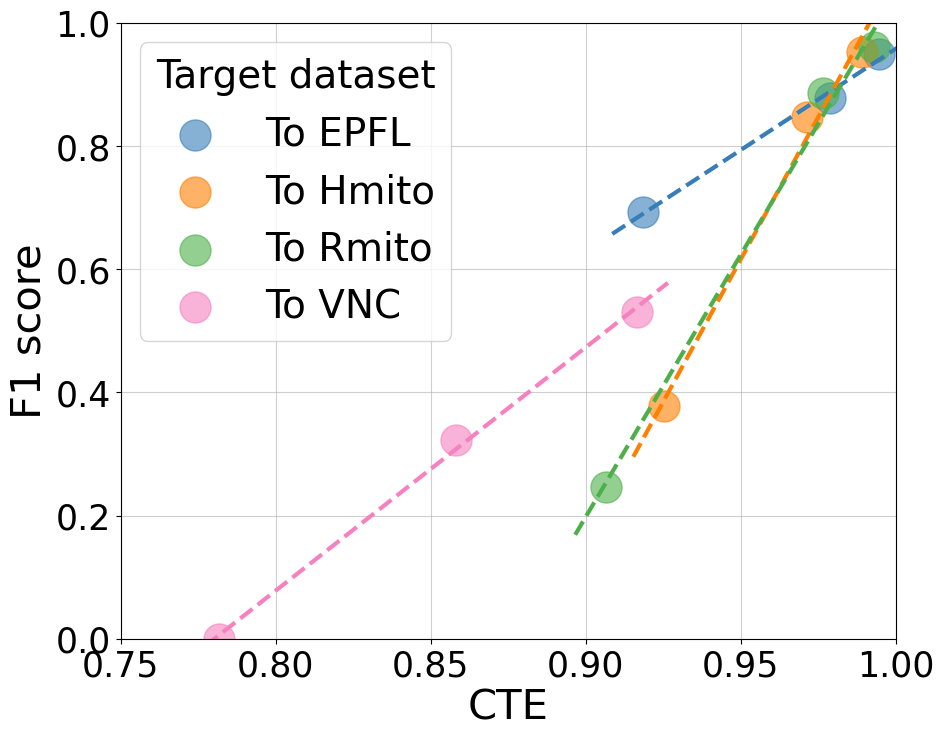

In [5]:
plot_multitarget_correlations(
    cmb_consis,
    cmb_perf,
    xlim=(0.75,1),
    perf_metric_name="F1 score",
)